In [1]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)   # n_outliers = 45
n_inliers = n_samples - n_outliers                # n_inliers = 300-45 = 255

In [3]:
model = svm.OneClassSVM(kernel="rbf" , nu=outliers_fraction, gamma=0.1)

In [4]:
anomaly_algorithms = [("One-Class SVM", model)]

In [5]:
blobs_params = dict(n_samples=255 , n_features=2 , random_state=0 )

In [6]:
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]]  , cluster_std=0.5       , **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3] , **blobs_params)[0],
    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -np.array([0.5, 0.25])),
    14. * (np.random.RandomState(42).rand(n_samples, 2) - 0.5)
]

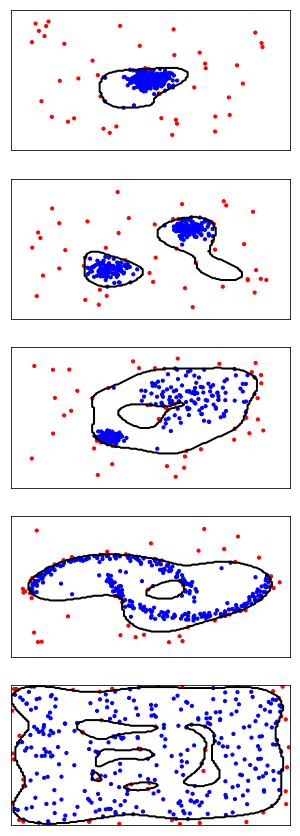

In [7]:
plt.figure(figsize=(5 , 15))
plot_num = 1
rng = np.random.RandomState(42)

xx, yy = np.meshgrid(np.linspace(-7, 7, 150),  np.linspace(-7, 7, 150))
for i, X in enumerate(datasets):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6,size=(n_outliers, 2))], axis=0)

    for name, algorithm in anomaly_algorithms:
        algorithm.fit(X)
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        #plt.title(name, size=8)

        y_pred = algorithm.fit(X).predict(X)

        Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

        colors = np.array(['r', 'b'])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1